## Text Analytics on Yelp Reviews to improve the Restaurant Busines

### Import

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

# 1.3 The Dataset

## 1.3.1 Data Manipulation

### 2018 Review Dataset 

In [2]:
# Please consider changing the file path to read the csv file
df_2018 = pd.read_csv('/Users/gianmarcosoraru/Documents/Bocconi/TESI/yelp_dataset/yelp_csv/df2018.csv')

In [3]:
df_2018.shape

(1177662, 10)

In [4]:
df_2018.columns

Index(['Unnamed: 0', 'business_id', 'cool', 'date', 'funny', 'review_id',
       'stars', 'text', 'useful', 'user_id'],
      dtype='object')

In [168]:
df_2018.head(10)

,Unnamed: 0,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,3,ikCg8xy5JIg_NGPx-MSIDA,0,2018-01-09 20:56:38,0,yi0R0Ugj_xUx_Nek0-_Qig,5,Went in for a lunch. Steak sandwich was delici...,0,dacAIZ6fTM6mqwW5uxkskg
1,4,b1b1eb3uo-w561D0ZfCEiQ,0,2018-01-30 23:07:38,0,11a8sVPMUFtaC7_ABRkmtw,1,Today was my second out of three sessions I ha...,7,ssoyf2_x0EQMed6fgHeMyQ
2,13,LUN6swQYa4xJKaM_UEUOEw,0,2018-04-27 20:25:26,0,qlXw1JQ0UodW7qrmVgwCXw,4,Michael from Red Carpet VIP is amazing ! I rea...,0,bAhqAPoWaZYcyYi7bs024Q
3,38,5OZlLXjU0FXUbrw8Scja6g,0,2018-02-01 19:01:16,0,vBRxlgkpDTXjWiYBp1V6GA,1,They keep there appointments on time and are p...,0,wNyiw6GfVfn5Kphqmux1gw
4,42,wJj1EwYcXHdvA9zKqmb5hQ,0,2018-10-04 11:20:42,0,NqYSX93Amv4sd5pPPr3Gag,5,I called the number provided and same day they...,0,zFYFuufYWQSPj0r5lrKQKg
5,43,jScBTQtdAt-8RshaiBEHgw,1,2018-05-28 20:56:05,0,j3vP8537KHvoXNHQIr3haA,5,"Party of 3 ordered the fish tacos, pork belly ...",1,Z_HE_KKT7N-WddPTzUQC7A
6,74,smIh1HppyfXphiGMJPnZDg,0,2018-04-27 18:32:25,0,ReFXQwEtx_qyjC-G8RPviQ,5,My company hosted a dinner and awards night at...,0,Hxs41092f4HDP-q9_Q-RhA
7,76,CGUK3cd2gxp2q3KPY19Oog,0,2018-04-15 11:34:34,0,LrO2MkIWIjAoOeS5WImnrQ,5,Yum!! Had the kale grits and would definitely ...,0,hzny0aF2jcUaY8rXN2bfJQ
8,84,sk0stgY4NDJYOX1MbNJ3Pg,0,2018-09-25 03:58:48,0,SneRds-D0MCMWbIitd0AHg,1,At least the Pinks concession stand by Section...,0,WThN-4czFfMs1vYhvaf_9A
9,97,xS5HGqgk0KY2jFWU-l_nrA,0,2018-09-25 03:54:06,0,RKGH2ZQHyBNgJwQ84lKMFg,4,I'm not that familiar with Scottsdale so I'm j...,0,pHKISjytTmP0LrP952_32w


### Business Dataset (restaurant name, location, stars).

In [6]:
business_df= pd.read_json('/Users/gianmarcosoraru/Documents/Bocconi/TESI/yelp_dataset/business.json',lines = True)

In [169]:
business_df.head(10)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'HasTV': 'False', 'BusinessParking': '{'garag...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Wednesday': '9:0-0:0', ...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'HasTV': 'True', 'RestaurantsPriceRange2': '2...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Wednesday': '7:0-23:0'...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC
5,"Credit Valley Town Plaza, F2 - 6045 Creditview Rd","{'BusinessParking': '{'garage': False, 'street...",68dUKd8_8liJ7in4aWOSEA,"Shipping Centers, Couriers & Delivery Services...",Mississauga,"{'Monday': '9:0-19:0', 'Wednesday': '9:0-20:0'...",1,43.599475,-79.711584,The UPS Store,L5V 0B1,3,2.5,ON
6,20 Douglas Woods Drive Southeast,"{'BusinessParking': '{'garage': False, 'street...",5JucpCfHZltJh5r1JabjDg,"Beauty & Spas, Hair Salons",Calgary,None,1,50.943646,-114.001828,Edgeworxx Studio,T2Z 1K4,7,3.5,AB
7,"4545 E Tropicana Rd Ste 8, Tropicana","{'BikeParking': 'False', 'GoodForKids': 'True'...",gbQN7vr_caG_A1ugSmGhWg,"Hair Salons, Hair Stylists, Barbers, Men's Hai...",Las Vegas,"{'Monday': '10:0-19:0', 'Wednesday': '10:0-19:...",1,36.099872,-115.074574,Supercuts,89121,3,3.5,NV
8,5940 W Union Hills Dr,"{'BusinessParking': '{'garage': False, 'street...",Y6iyemLX_oylRpnr38vgMA,"Nail Salons, Beauty & Spas, Day Spas",Glendale,"{'Saturday': '10:0-14:0', 'Tuesday': '12:0-18:...",0,33.654815,-112.188568,Vita Bella Fine Day Spa,85308,8,5.0,AZ
9,21689 Lorain Rd,"{'BusinessParking': '{'garage': False, 'street...",4GBVPIYRvzGh4K4TkRQ_rw,"Beauty & Spas, Nail Salons, Day Spas, Massage",Fairview Park,"{'Saturday': '9:0-16:0', 'Tuesday': '9:0-21:0'...",1,41.440825,-81.854097,Options Salon & Spa,44126,8,4.5,OH


In [8]:
business_df.columns

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'postal_code',
       'review_count', 'stars', 'state'],
      dtype='object')

### Merge the 'business_df' with 'review_df'

In [9]:
df_2018_with_business = df_2018.merge(business_df, on = 'business_id' )

### Re-order the columns

In [10]:
columnsTitles = ['business_id', 'review_id', 'user_id','date', 'text', 'stars_x','cool', 'funny', 'useful',
                 'name','stars_y','categories','attributes', 'address', 'city','state', 'latitude','longitude', 'postal_code', 'review_count']

df_2018_with_business = df_2018_with_business.reindex(columns=columnsTitles)

### Renaming columns

In [11]:
df_2018_with_business = df_2018_with_business.rename(columns={"stars_x": "review_stars", "stars_y": "restaurant_stars"})

In [12]:
df_2018_with_business.shape

(1177662, 20)

In [170]:
df_2018_with_business.head(10)

,business_id,review_id,user_id,date,text,review_stars,cool,funny,useful,name,restaurant_stars,categories,attributes,address,city,state,latitude,longitude,postal_code,review_count
0,ikCg8xy5JIg_NGPx-MSIDA,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,2018-01-09 20:56:38,Went in for a lunch. Steak sandwich was delici...,5,0,0,0,Regal Beagle Pub,3.0,"Bars, Pubs, Nightlife, Tapas Bars, Restaurants","{'HasTV': 'True', 'Ambience': '{'romantic': Fa...",180 94 Ave SE,Calgary,AB,50.969721,-114.070115,T2J 3G8,13
1,ikCg8xy5JIg_NGPx-MSIDA,j5nfceliDXuzKEAqaNl2ig,vcdgXzALsXXuxrkUthE3sA,2018-06-18 09:54:52,Beware of a waitress from Sweden! Her name is ...,1,0,1,0,Regal Beagle Pub,3.0,"Bars, Pubs, Nightlife, Tapas Bars, Restaurants","{'HasTV': 'True', 'Ambience': '{'romantic': Fa...",180 94 Ave SE,Calgary,AB,50.969721,-114.070115,T2J 3G8,13
2,b1b1eb3uo-w561D0ZfCEiQ,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,2018-01-30 23:07:38,Today was my second out of three sessions I ha...,1,0,0,7,White Teeth AZ,4.5,"Teeth Whitening, Beauty & Spas","{'BusinessAcceptsBitcoin': 'False', 'BusinessP...","4160 N Craftsman Ct, Ste 202",Scottsdale,AZ,33.496713,-111.927958,85251,75
3,b1b1eb3uo-w561D0ZfCEiQ,M6awpSbo7X2r7Jj7qNBOyA,prVZz8h0eWBrkbGY-5jURw,2018-03-23 19:23:53,I bought 3 treatments on Groupon and paid a li...,5,0,0,0,White Teeth AZ,4.5,"Teeth Whitening, Beauty & Spas","{'BusinessAcceptsBitcoin': 'False', 'BusinessP...","4160 N Craftsman Ct, Ste 202",Scottsdale,AZ,33.496713,-111.927958,85251,75
4,b1b1eb3uo-w561D0ZfCEiQ,LRv3-AiiNvpLwZsWR9NFPw,ON6OwLnffcJJhsOFxJBicQ,2018-06-19 19:44:26,This is THE spot to get your pearly whites loo...,5,0,0,0,White Teeth AZ,4.5,"Teeth Whitening, Beauty & Spas","{'BusinessAcceptsBitcoin': 'False', 'BusinessP...","4160 N Craftsman Ct, Ste 202",Scottsdale,AZ,33.496713,-111.927958,85251,75
5,b1b1eb3uo-w561D0ZfCEiQ,vBwDkdE5RAk0PTin6J23Ig,4J763J8pjlA4sRKrXe5O_w,2018-06-09 20:55:15,DO NOT DO NOT!!!! My boyfriend and I are in ex...,1,0,0,2,White Teeth AZ,4.5,"Teeth Whitening, Beauty & Spas","{'BusinessAcceptsBitcoin': 'False', 'BusinessP...","4160 N Craftsman Ct, Ste 202",Scottsdale,AZ,33.496713,-111.927958,85251,75
6,b1b1eb3uo-w561D0ZfCEiQ,iMbAEKljaBGzi4WNvkl3yg,n16cJwa7MEhKy9R5qXGZ8w,2018-07-17 22:52:48,Meredith and the girls are kind and helpful. ...,5,0,0,0,White Teeth AZ,4.5,"Teeth Whitening, Beauty & Spas","{'BusinessAcceptsBitcoin': 'False', 'BusinessP...","4160 N Craftsman Ct, Ste 202",Scottsdale,AZ,33.496713,-111.927958,85251,75
7,b1b1eb3uo-w561D0ZfCEiQ,Ya_YhCGwT6p8CJACLkYkQg,K77rbOXYT_noKu7mpF20Mw,2018-06-19 23:33:34,My first teeth whitening experience was at a d...,5,0,0,0,White Teeth AZ,4.5,"Teeth Whitening, Beauty & Spas","{'BusinessAcceptsBitcoin': 'False', 'BusinessP...","4160 N Craftsman Ct, Ste 202",Scottsdale,AZ,33.496713,-111.927958,85251,75
8,b1b1eb3uo-w561D0ZfCEiQ,EkfA4KmTZnhXKGW0Ggrf8A,x7ypIc-61ys6dkdkf4vrXA,2018-04-30 17:19:45,Good quick service & affordable pricing. Have ...,5,0,0,0,White Teeth AZ,4.5,"Teeth Whitening, Beauty & Spas","{'BusinessAcceptsBitcoin': 'False', 'BusinessP...","4160 N Craftsman Ct, Ste 202",Scottsdale,AZ,33.496713,-111.927958,85251,75
9,b1b1eb3uo-w561D0ZfCEiQ,8lZWYtxqoq6LzBPSyO2NrQ,BOGS2dSDLL_ot6NVa6NnMg,2018-06-10 02:07:50,Very pleased with my results. Staff was helpf...,5,0,0,0,White Teeth AZ,4.5,"Teeth Whitening, Beauty & Spas","{'BusinessAcceptsBitcoin': 'False', 'BusinessP...","4160 N Craftsman Ct, Ste 202",Scottsdale,AZ,33.496713,-111.927958,85251,75


### 2018 Restaurant DataSet: 'df_2018_restaurants'

I filter out only reviews of restaurants using the column categories which contains the main industry of each business. I filter on the words 'Restaurants' and 'Food'.

In [14]:
df_2018_restaurants = df_2018_with_business[df_2018_with_business['categories'].str.contains('Restaurants|Food') == True]
print('Shape df_2018_restaurants: ',df_2018_restaurants.shape)

Shape df_2018_restaurants:  (784155, 20)


### REDUCED  DATASET:       df_2018_restaurants_reduced

I reduce the dataset from 700 thousand observations, to 50 thousand for computational efficiency

In [15]:
df_2018_restaurants_reduced = df_2018_restaurants.sample(50000,random_state = 3540)

In [16]:
df_2018_restaurants_reduced.shape

(50000, 20)

### Export 'df_2018_restaurants_reduced' to csv

I here export the 'df_2018_restaurants_reduced' dataset so it can easily be accessed without having to go through all the code again.

In [17]:
os.chdir('/Users/gianmarcosoraru/Documents/Bocconi/TESI/yelp_dataset/restaurant_2018_csv')
df_2018_restaurants_reduced.to_csv('df_2018_restaurants_reduced.csv')

### Import 'df_2018_restaurants_reduced' 

One can use the following short-cut to load the 'df_2018_restaurants_reduced' dataset without having to do all the above

In [18]:
# df_2018_restaurants_reduced = pd.read_csv('/Users/gianmarcosoraru/Documents/Bocconi/TESI/yelp_dataset/restaurant_2018_csv/df_2018_restaurants_reduced.csv')

## 1.3.2 Data Visualization

### Unbalanced Dataset

Here I check if the dataset is unbalanced on the 'review_stars' column. I indeed find out that the dataset is unbalanced and I will deal with the issue later on in the analysis.

In [19]:
df_2018_restaurants_reduced.review_stars.value_counts()

5    23770
4    10133
1     6819
3     5377
2     3901
Name: review_stars, dtype: int64

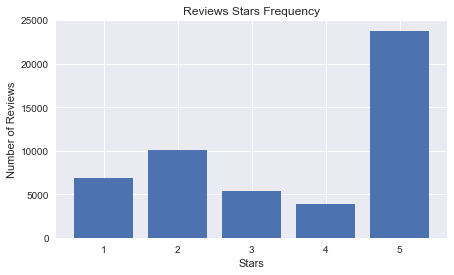

In [20]:
plt.figure(figsize=(7,4))
plt.bar(df_2018_restaurants_reduced.review_stars.unique(),df_2018_restaurants_reduced.review_stars.value_counts())
plt.title('Reviews Stars Frequency')
plt.xlabel('Stars')
plt.ylabel('Number of Reviews')
plt.savefig('stars.png')
plt.savefig('stars.pdf')
plt.show()

I continue with the data exploration process.

In [21]:
df_2018_restaurants_reduced.columns

Index(['business_id', 'review_id', 'user_id', 'date', 'text', 'review_stars',
       'cool', 'funny', 'useful', 'name', 'restaurant_stars', 'categories',
       'attributes', 'address', 'city', 'state', 'latitude', 'longitude',
       'postal_code', 'review_count'],
      dtype='object')

### Most reviewed Restaurants

In [22]:
df_2018_restaurants_reduced.name.value_counts()[:10]

Starbucks                       281
McDonald's                      258
Gordon Ramsay Hell's Kitchen    134
First Watch                     105
Hash House A Go Go              102
Nacho Daddy                      93
Dunkin' Donuts                   93
In-N-Out Burger                  90
Panda Express                    88
Bacchanal Buffet                 86
Name: name, dtype: int64

/Users/gianmarcosoraru/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


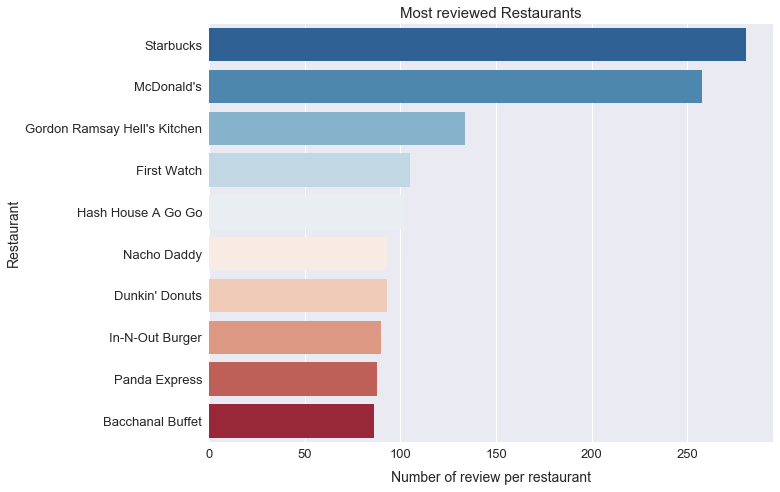

In [23]:
plt.figure(figsize=(11,7))
top_restaurants = df_2018_restaurants_reduced.name.value_counts()[:10]
sns.countplot(y='name',data=df_2018_restaurants_reduced, order = top_restaurants.index, palette= sns.color_palette("RdBu_r", len(top_restaurants)))

plt.xlabel('Number of review per restaurant', fontsize=14, labelpad=10)
plt.ylabel('Restaurant', fontsize=14)
plt.title('Most reviewed Restaurants', fontsize=15)
plt.tick_params(labelsize=13)

plt.tight_layout()
plt.savefig('rest_name.png')
plt.savefig('rest_name.pdf')
plt.show()

### Count of Reviews by City

In [24]:
df_2018_restaurants_reduced.city.value_counts()[:10]

Las Vegas     14422
Phoenix        4839
Toronto        4034
Charlotte      2824
Scottsdale     2559
Pittsburgh     1920
Henderson      1559
Mesa           1271
Tempe          1266
Montréal       1258
Name: city, dtype: int64

/Users/gianmarcosoraru/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


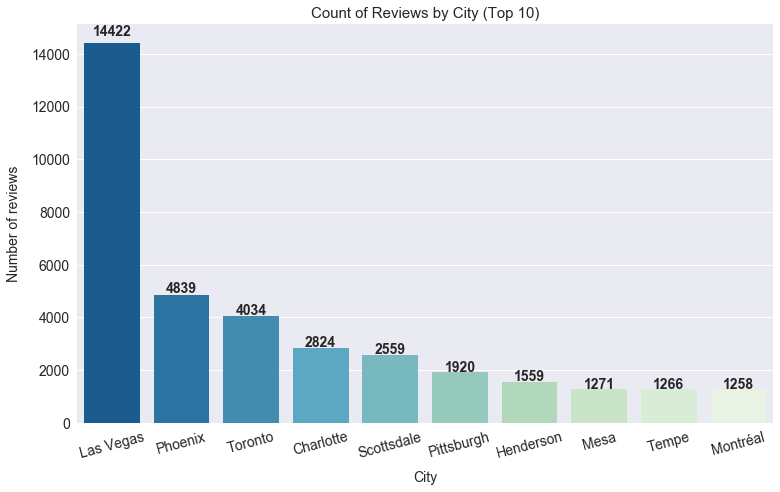

In [25]:
plt.figure(figsize=(11,7))
top_cities = df_2018_restaurants_reduced.city.value_counts()[:10]
sns.barplot(top_cities.index, top_cities.values, palette=sns.color_palette("GnBu_r", len(top_cities)))

plt.ylabel('Number of reviews', fontsize=14, labelpad=10)
plt.xlabel('City', fontsize=14, labelpad=10)
plt.title('Count of Reviews by City (Top 10)', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(top_cities):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)
plt.tight_layout()
plt.savefig('city_name.png')
plt.savefig('city_name.pdf')
plt.show()


### Count of Reviews by State

In [26]:
df_2018_restaurants_reduced.state.value_counts()[:10]

NV    16474
AZ    14503
ON     6569
NC     3794
OH     2745
PA     2487
QC     1522
WI      860
AB      592
SC      236
Name: state, dtype: int64

/Users/gianmarcosoraru/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


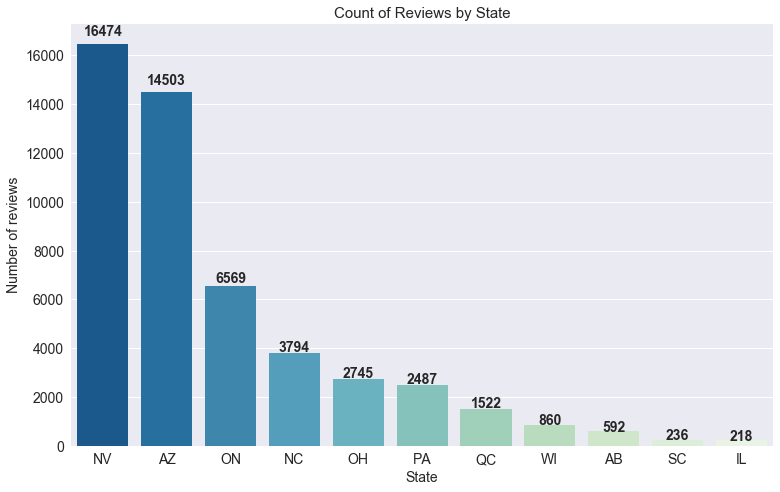

In [27]:
plt.figure(figsize=(11,7))
top_states = df_2018_restaurants_reduced.state.value_counts()
sns.barplot(top_states.index, top_states.values,palette=sns.color_palette("GnBu_r", len(top_states)) )
plt.ylabel('Number of reviews', fontsize=14)
plt.xlabel('State', fontsize=14)
plt.title('Count of Reviews by State', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(top_states):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.savefig('state_name.png')
plt.savefig('state_name.pdf')
plt.show()

# 2 METHOD

### CREATION OF POLARITY COLUMN

First I add the column 'Polarity' to the dataset. I will use this column as the predefined label to add to the text reviews to train the machine learning classifiers. 

Below I created a function which discriminates reviews into positive and negative polarity, based on their review stars:

{1,2} : 0 NEGATIVE

{3,4,5}:  1 POSITIVE

In [28]:
def text_polarity(x):
    if x['review_stars'] == 1 or x['review_stars'] == 2:
        x['polarity'] = 0 #NEGATIVE
        
    elif x['review_stars'] == 3 or x['review_stars'] == 4 or x['review_stars'] == 5:
        x['polarity'] = 1 #POSITIVE
    return x 

In [71]:
df_2018_restaurants_reduced = df_2018_restaurants_reduced.apply(text_polarity, axis=1)

### Unbalanced Polarity Class

I check if the dataset is still unbalanced when looking at the polarity class

In [30]:
df_2018_restaurants_reduced.polarity.value_counts()

1    39280
0    10720
Name: polarity, dtype: int64

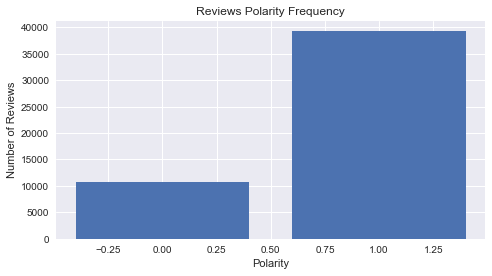

In [31]:
plt.figure(figsize=(7,4))
plt.bar(df_2018_restaurants_reduced.polarity.unique(),df_2018_restaurants_reduced.polarity.value_counts())
plt.title('Reviews Polarity Frequency')
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.savefig('polarity.png')
plt.savefig('polarity.pdf')
plt.show()

# 2.3 Text Classification

## 2.3.1 Text Pre Process

In [32]:
X = df_2018_restaurants_reduced['text']
y = df_2018_restaurants_reduced['polarity']

### English Stop Words

Below is an example of 10 English Stop Words used in the analysis.

In [33]:
from nltk.corpus import stopwords
english_stop_words = stopwords.words('english')
english_stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

### Text Cleaning 

I created a function to clean the text reviews. The function takes care of: Lower casing the text; tokenizing and removing punctuation; removing numbers; remove stop words; stemming.

In [35]:
#from nltk.corpus import stopwords
#english_stop_words = stopwords.words('english')
from nltk.stem.porter import PorterStemmer
import string
stemmer = PorterStemmer()


def text_cleaning(text):
    # lower the text
    text = text.lower()
    
    # tokenize the text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    
    # remove numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    
    # stemming 
    text = [stemmer.stem(t) for t in text]
    
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    
    # join all
    text = " ".join(text)
    return(text)

I apply the function to clean the text reviews contained in X.

In [36]:
X_clean = X.apply(lambda x: text_cleaning(x))

## 2.3.2 Vectorization

Below I use CountVectorizer method from Sklearn to vectorize the text reviews. CountVectorize implements a Bag of Words vectorization and in this case binary counts was passed in as variable.

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
vocab = CountVectorizer(binary = True).fit(X_clean)

### Words in the vocabulary

In [173]:
vocab.get_feature_names()[:30]

['aah',
 'aback',
 'abhor',
 'abita',
 'abl',
 'abnorm',
 'about',
 'absolut',
 'absurdli',
 'abuzz',
 'abyss',
 'accept',
 'access',
 'accessor',
 'accident',
 'accomd',
 'accommod',
 'accommodating',
 'accompani',
 'accord',
 'accordingli',
 'account',
 'accoutr',
 'accur',
 'accus',
 'ach',
 'across',
 'act',
 'action',
 'actual']

### Length Vocabulary

In [40]:
len(vocab.vocabulary_)

35776

### Creating Sparse Matrix

After I create the Vocabulary Matrix, I use this to vectorize all the reviews in X so that they can be passed to an ML classifier.

In [41]:
X = vocab.transform(X)

# 3 Results

Below are the results of multiple classification algorithms. First I test the results with the Vocabulary Matrix created above, using Binary CountVectorizer (hence Binary Bag of Words).

## 3.1 Text Classifiers

### Binary Bag of Words

NB in this attempt the dataset is still unbalanced

### Splitting into train and test

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=3540)

### Multinomial Naive Bayes (BoW)

In [43]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
preds = nb.predict(X_test)

In [843]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print("Score:",round(accuracy_score(y_test,preds)*100,2))
print(classification_report(y_test, preds))

[[ 2493   731]
 [  664 11112]]
Score: 90.7
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      3224
           1       0.94      0.94      0.94     11776

   micro avg       0.91      0.91      0.91     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.91      0.91      0.91     15000



### Random Forests Classifier (BoW)

In [844]:
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(X_train,y_train)
predrmfr = rmfr.predict(X_test)

/Users/gianmarcosoraru/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [845]:
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:")
print(classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[ 1703  1521]
 [  530 11246]]
Score: 86.33
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.53      0.62      3224
           1       0.88      0.95      0.92     11776

   micro avg       0.86      0.86      0.86     15000
   macro avg       0.82      0.74      0.77     15000
weighted avg       0.86      0.86      0.85     15000



### MULTILAYER PERCEPTRON CLASSIFIER (BoW)

In [48]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
predmlp = mlp.predict(X_test)

In [51]:
print("Confusion Matrix for Multilayer Perceptron Classifier:")
print(confusion_matrix(y_test,predmlp))
print("Score:",round(accuracy_score(y_test,predmlp)*100,2))
print("Classification Report:")
print(classification_report(y_test,predmlp))

Confusion Matrix for Multilayer Perceptron Classifier:
[[ 2408   816]
 [  566 11210]]
Score: 90.79
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      3224
           1       0.93      0.95      0.94     11776

   micro avg       0.91      0.91      0.91     15000
   macro avg       0.87      0.85      0.86     15000
weighted avg       0.91      0.91      0.91     15000



### Support Vector Machine (BoW)

In [44]:
from sklearn.svm import SVC
svm = SVC(random_state=101)
svm.fit(X_train,y_train)
predsvm = svm.predict(X_test)

/Users/gianmarcosoraru/anaconda/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [52]:
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:")
print(classification_report(y_test,predsvm))

Confusion Matrix for Support Vector Machines:
[[    0  3224]
 [    0 11776]]
Score: 78.51
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3224
           1       0.79      1.00      0.88     11776

   micro avg       0.79      0.79      0.79     15000
   macro avg       0.39      0.50      0.44     15000
weighted avg       0.62      0.79      0.69     15000



/Users/gianmarcosoraru/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Gradient Boosting Classifier (BoW)

In [852]:
from sklearn.ensemble import GradientBoostingClassifier
gbi = GradientBoostingClassifier(random_state = 3540)
gbi.fit(X_train,y_train)
predgbi = gbi.predict(X_test)

In [853]:
print("Confusion Matrix for Gradient Boosting Classifier:")
print(confusion_matrix(y_test,predgbi))
print("Score:",round(accuracy_score(y_test,predgbi)*100,2))
print("Classification Report:")
print(classification_report(y_test,predgbi))

Confusion Matrix for Gradient Boosting Classifier:
[[ 1668  1556]
 [  258 11518]]
Score: 87.91
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.52      0.65      3224
           1       0.88      0.98      0.93     11776

   micro avg       0.88      0.88      0.88     15000
   macro avg       0.87      0.75      0.79     15000
weighted avg       0.88      0.88      0.87     15000



###  TF-IDF 

Here I implement TF-IDF Vectorization. I use Sklearn's TfidfVectorizer method.

NB in this attempt the dataset is still unbalanced

In [332]:
X = df_2018_restaurants_reduced['text']
y = df_2018_restaurants_reduced['polarity']

### TfidfVectorizer

In [329]:
from sklearn.feature_extraction.text import TfidfVectorizer
vocab = TfidfVectorizer().fit(X_clean)

### Length Vocabulary

In [330]:
len(vocab.vocabulary_)

35776

### Creating Sparse Matrix

Again, after I create the Vocabulary Matrix, I use this to vectorize all the reviews in X so that they can be passed to an ML classifier.

In [ ]:
X = vocab.transform(X)

### Splitting into train and test

In [336]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=3540)

### Multinomial Naive Bayes (TF-IDF)

In [337]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
preds = nb.predict(X_test)

In [338]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print("Score:",round(accuracy_score(y_test,preds)*100,2))
print("Classification Report:")
print(classification_report(y_test, preds))

[[   84  3140]
 [   13 11763]]
Score: 78.98
              precision    recall  f1-score   support

           0       0.87      0.03      0.05      3224
           1       0.79      1.00      0.88     11776

   micro avg       0.79      0.79      0.79     15000
   macro avg       0.83      0.51      0.47     15000
weighted avg       0.81      0.79      0.70     15000



### Random Forests Classifier (TF-IDF)

In [339]:
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(X_train,y_train)
predrmfr = rmfr.predict(X_test)

/Users/gianmarcosoraru/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [340]:
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:")
print(classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[ 1565  1659]
 [  380 11396]]
Score: 86.41
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.49      0.61      3224
           1       0.87      0.97      0.92     11776

   micro avg       0.86      0.86      0.86     15000
   macro avg       0.84      0.73      0.76     15000
weighted avg       0.86      0.86      0.85     15000



### MULTILAYER PERCEPTRON CLASSIFIER (TF-IDF)

In [341]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
predmlp = mlp.predict(X_test)

/Users/gianmarcosoraru/anaconda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [342]:
print("Confusion Matrix for Multilayer Perceptron Classifier:")
print(confusion_matrix(y_test,predmlp))
print("Score:",round(accuracy_score(y_test,predmlp)*100,2))
print("Classification Report:")
print(classification_report(y_test,predmlp))

Confusion Matrix for Multilayer Perceptron Classifier:
[[ 2549   675]
 [  555 11221]]
Score: 91.8
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      3224
           1       0.94      0.95      0.95     11776

   micro avg       0.92      0.92      0.92     15000
   macro avg       0.88      0.87      0.88     15000
weighted avg       0.92      0.92      0.92     15000



## Balancing the dataset

After seeing that the unbalanced classes were causing issues in the Classification Algorithms, I decide to tackle the issue by Random Down Sampling only the Test Data.

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data_train, data_test = train_test_split(df_2018_restaurants_reduced,test_size=0.3,random_state=3540)

Now i only balance the training data. The test set will remain unbalanced

### Random Down-Sampling (only on train data)

In [54]:
data_train['polarity'].value_counts()

1    27504
0     7496
Name: polarity, dtype: int64

In [55]:
from sklearn.utils import resample
df_train_minority = data_train[data_train.polarity==0]
df_train_majority = data_train[data_train.polarity==1]

# Downsample majority class
df_train_majority_downsampled = resample(df_train_majority, replace=False,n_samples=7496,random_state=3540)
                                      
                                     
                                  

# Combine minority class with downsampled majority class
df_train_downsampled = pd.concat([df_train_majority_downsampled, df_train_minority])

df_train_downsampled.polarity.value_counts()

1    7496
0    7496
Name: polarity, dtype: int64

Now the training dataset is balanced. I can train my model 

## Balanced Classification

### Binary Bag-of-Words on Balanced Data

In [56]:
X = df_2018_restaurants_reduced['text']
y = df_2018_restaurants_reduced['polarity']

I create the vocabulary

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
vocab = CountVectorizer(binary = True).fit(X_clean)

I vectorize the BALANCED training data and the test data.

In [58]:
X_train = vocab.transform(df_train_downsampled.text)
y_train = df_train_downsampled.polarity

X_test  = vocab.transform(data_test.text)
y_test  = data_test.polarity

### MNB on Balanced Data (BoW)

MNB is still very good with Balanced Data. Accuracy score is stil very high (almost 90%) and the precisions for each class are high as well.

In [59]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
preds = nb.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion Matrix:')
print(confusion_matrix(y_test, preds))
print("Accuracy:",round(accuracy_score(y_test,preds)*100,2))
print("Classification Report:")
print(classification_report(y_test, preds))

Confusion Matrix:
[[ 2858   366]
 [ 1296 10480]]
Accuracy: 88.92
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.89      0.77      3224
           1       0.97      0.89      0.93     11776

   micro avg       0.89      0.89      0.89     15000
   macro avg       0.83      0.89      0.85     15000
weighted avg       0.91      0.89      0.89     15000



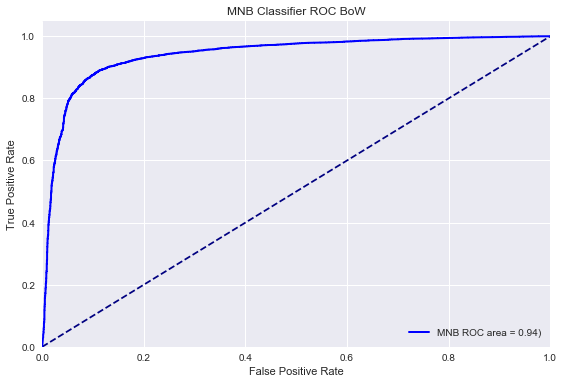

In [61]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

probs = nb.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
#GRAPH DATA
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('MNB Classifier ROC BoW')
plt.plot(fpr, tpr, color='blue', lw=2, label='MNB ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('ROC1.png')
plt.savefig('ROC1.pdf')
plt.show()

### Random Forests on Balanced Data (BoW)

We see that balancing the dataset, the accuracy decreases of almost 10 percentage points. Also we have a high number of False Positives, hence negative reviews that were classified as being positive. This can be bad as we might expect a company to prefer classifying a positive review as negative and double checking what were the issues in the review, than the other way around (hence we expect the company to prefer more False Negatives, positive reviewes classified as negative).

In [603]:
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(X_train,y_train)
predrmfr = rmfr.predict(X_test)

/Users/gianmarcosoraru/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [604]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,predrmfr))
print("Accuracy:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:")
print(classification_report(y_test,predrmfr))

Confusion Matrix:
[[2866  358]
 [3127 8649]]
Accuracy: 76.77
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.89      0.62      3224
           1       0.96      0.73      0.83     11776

   micro avg       0.77      0.77      0.77     15000
   macro avg       0.72      0.81      0.73     15000
weighted avg       0.86      0.77      0.79     15000



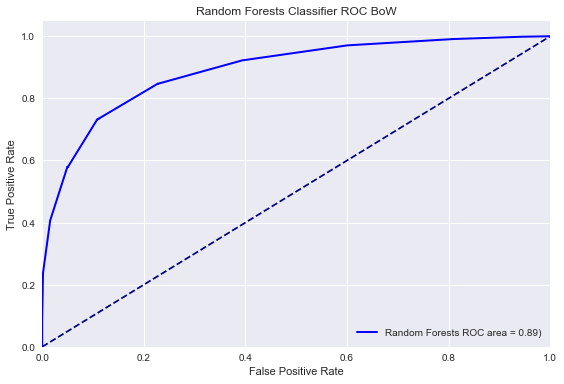

In [605]:
from sklearn.metrics import auc
probsrmfr = rmfr.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, probsrmfr)
roc_auc = auc(fpr, tpr)
#GRAPH DATA
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Random Forests Classifier ROC BoW')
plt.plot(fpr, tpr, color='blue', lw=2, label='Random Forests ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('ROC2.png')
plt.savefig('ROC2.pdf')
plt.show()

### SVM on Balanced Data (BoW)


In [858]:
from sklearn.svm import SVC
svm = SVC(random_state=3540)
svm.fit(X_train,y_train)
predsvm = svm.predict(X_test)

/Users/gianmarcosoraru/anaconda/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [859]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,predsvm))
print("Accuracy:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:")
print(classification_report(y_test,predsvm))

Confusion Matrix:
[[    0  3224]
 [    0 11776]]
Accuracy: 78.51
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3224
           1       0.79      1.00      0.88     11776

   micro avg       0.79      0.79      0.79     15000
   macro avg       0.39      0.50      0.44     15000
weighted avg       0.62      0.79      0.69     15000



/Users/gianmarcosoraru/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### TF-IDF on Balanced Data

I create the vocabulary

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
vocab = TfidfVectorizer().fit(X_clean)

I vectorize the BALANCED training data and the test data.

In [63]:
X_train = vocab.transform(df_train_downsampled.text)
y_train = df_train_downsampled.polarity

X_test  = vocab.transform(data_test.text)
y_test  = data_test.polarity

### MNB on Balanced Data (TF-IDF)

In [64]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
preds = nb.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion Matrix:')
print(confusion_matrix(y_test, preds))
print("Accuracy:",round(accuracy_score(y_test,preds)*100,2))
print("Classification Report:")
print(classification_report(y_test, preds))

Confusion Matrix:
[[3001  223]
 [1905 9871]]
Accuracy: 85.81
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.93      0.74      3224
           1       0.98      0.84      0.90     11776

   micro avg       0.86      0.86      0.86     15000
   macro avg       0.79      0.88      0.82     15000
weighted avg       0.90      0.86      0.87     15000



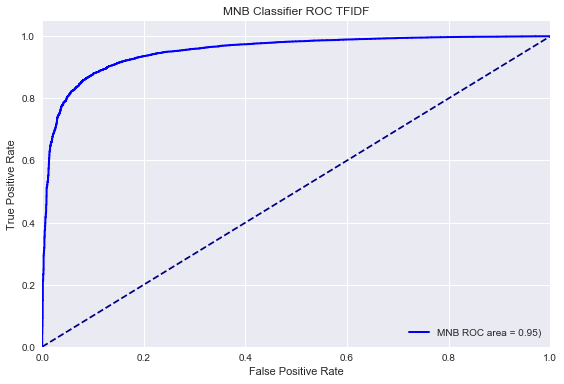

In [66]:
from sklearn.metrics import auc
probs = nb.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
#GRAPH DATA
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('MNB Classifier ROC TFIDF')
plt.plot(fpr, tpr, color='blue', lw=2, label='MNB ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('ROC3.png')
plt.savefig('ROC3.pdf')
plt.show()

### Random Forests on Balanced Data (TF-IDF)

In [68]:
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(X_train,y_train)
predrmfr = rmfr.predict(X_test)

/Users/gianmarcosoraru/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [69]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,predrmfr))
print("Accuracy:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:")
print(classification_report(y_test,predrmfr))

Confusion Matrix:
[[2832  392]
 [3014 8762]]
Accuracy: 77.29
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.88      0.62      3224
           1       0.96      0.74      0.84     11776

   micro avg       0.77      0.77      0.77     15000
   macro avg       0.72      0.81      0.73     15000
weighted avg       0.86      0.77      0.79     15000



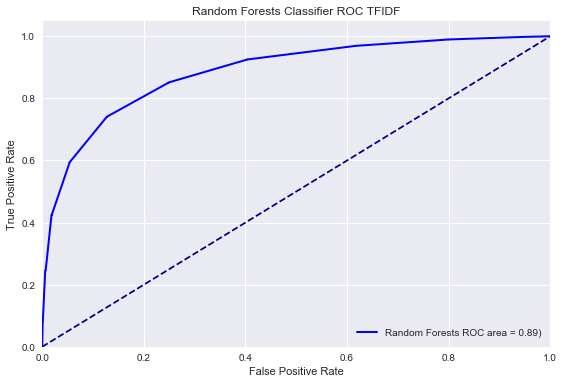

In [610]:
from sklearn.metrics import auc
probsrmfr = rmfr.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, probsrmfr)
roc_auc = auc(fpr, tpr)
#GRAPH DATA
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Random Forests Classifier ROC TFIDF')
plt.plot(fpr, tpr, color='blue', lw=2, label='Random Forests ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('ROC4.png')
plt.savefig('ROC4.pdf')
plt.show()

### SVM on Balanced Data (TF-IDF)

In [598]:
from sklearn.svm import SVC
svm = SVC(random_state=3540)
svm.fit(X_train,y_train)
predsvm = svm.predict(X_test)

/Users/gianmarcosoraru/anaconda/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [599]:
print("Confusion Matrix :")
print(confusion_matrix(y_test,predsvm))
print("Accuracy:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:")
print(classification_report(y_test,predsvm))

Confusion Matrix :
[[2848  376]
 [5506 6270]]
Accuracy: 60.79
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.88      0.49      3224
           1       0.94      0.53      0.68     11776

   micro avg       0.61      0.61      0.61     15000
   macro avg       0.64      0.71      0.59     15000
weighted avg       0.81      0.61      0.64     15000



## 3.1.4 Test on Random Reviews

### TEST ON POSITIVE REVIEW: SUCCESS

In [77]:
positive_review = df_2018_restaurants_reduced['text'][616105]
print('Review:')
print(positive_review)
print("Actual Rating: ",df_2018_restaurants_reduced['polarity'][616105])
positive_review_transf= vocab.transform([positive_review])
print("Predicted Rating:")
rmfr.predict(positive_review_transf)[0]

Review:
Best Philly cheesesteak (I can 100% positively say) I've ever had! 
First off, don't mind the location and it's outside environment. Don't let that stop you from entering! 
I came here to try why this place seemingly was very popular here for the cheesesteaks, so that's what I rated this on. 
Younger gal working the cashier taking orders can be less stern and more welcoming- but besides the point- 5 STARS for this cheesesteak! We came on a Friday afternoon around 11am (and on Fridays they have an $11 cheesesteak/fries+drink special). I went with a mushroom cheesesteak, with fried onions and cheese whiz and my lady got herself a plain steak no cheese sub. It was busy yet we didn't wait much long! Maybe around 5 mins or so. 
And the portions are pretty big!! Lots of meat on the infamous (Philly's own) amoroso roll. 
The fries weren't really as hot but it tasted really good still. *I recommend this place to anybody who's serious about a legit cheesesteak!*
Thank you very much Stra

1

### TEST ON NEGATIVE REVIEW: SUCCESS


In [79]:
negative_review = df_2018_restaurants_reduced['text'][981124]
print('Review:')
print(negative_review)
print("Actual Rating: ",df_2018_restaurants_reduced['polarity'][981124])
negative_review_transf = vocab.transform([negative_review])
print("Predicted Rating:")
rmfr.predict(negative_review_transf)[0]

Review:
Service was slow during a slow time. One waitress looked gorgeous, but had blinders on.  Customers served out of order as a result.  Management did nothing back up short staffing.  Had to ask for service to actually get any. Took order, but then returned to say the menu item was not available, which all three in my party had ordered. Offered a more expensive option, but we all order something else.  Verbally apologized but comped absolutely nothing and offered absolutely no equivalently valued items. Two stars because the food tasted alright.
Actual Rating:  0
Predicted Rating:


0

# 3.2 Focus: Fast Food Industry

In this section I will use Random Forests, 'feature_importances_' method  to understand which are the most important topics in positive and negative reviews for 4 Fast Food Chains

As showed below, the presence of many Fast Food chains in the dataset gave me the idea of choosing this industry for the Business application

In [80]:
df_2018_restaurants.name.value_counts()

Starbucks                                4157
McDonald's                               4144
Gordon Ramsay Hell's Kitchen             2078
Hash House A Go Go                       1586
Nacho Daddy                              1555
First Watch                              1530
Panera Bread                             1466
The Cheesecake Factory                   1413
Chipotle Mexican Grill                   1301
IHOP                                     1280
Denny's                                  1277
Panda Express                            1241
In-N-Out Burger                          1237
Taco Bell                                1237
Bacchanal Buffet                         1233
Yardbird Southern Table & Bar            1173
Dutch Bros Coffee                        1169
Subway                                   1160
Buffalo Wild Wings                       1143
Shake Shack                              1118
Dunkin' Donuts                           1114
Oregano's Pizza Bistro            

For each of the 4 Fast Food Chains, a new dataset is created from the original 'df_2018_restaurants' dataset containing 700 thousand reviews.

## 3.2.1 MCDONALD'S

In [81]:
mc_dataframe = df_2018_restaurants[df_2018_restaurants.name == "McDonald's"]

In [82]:
mc_dataframe = mc_dataframe.apply(text_polarity, axis=1)

In [83]:
mc_dataframe.shape

(4144, 21)

### Random Forests on Balanced Data (BoW)

In [84]:
mc_dataframeX = mc_dataframe['text']
mc_dataframey = mc_dataframe['polarity']

I clean the text.

In [85]:
mc_dataframeXClean = mc_dataframeX.apply(lambda x: text_cleaning(x))

I create the Vocabulary Matrix

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
vocab = CountVectorizer(binary = True).fit(mc_dataframeXClean)

I vectorize the reviews

In [87]:
mc_dataframeX = vocab.transform(mc_dataframeX)

Train the Random Forsts Classifiers

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(mc_dataframeX,mc_dataframey,test_size=0.3,random_state=3540)

In [89]:
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(X_train,y_train)
predrmfr = rmfr.predict(X_test)

/Users/gianmarcosoraru/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [90]:
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:")
print(classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[948  16]
 [197  83]]
Score: 82.88
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       964
           1       0.84      0.30      0.44       280

   micro avg       0.83      0.83      0.83      1244
   macro avg       0.83      0.64      0.67      1244
weighted avg       0.83      0.83      0.80      1244



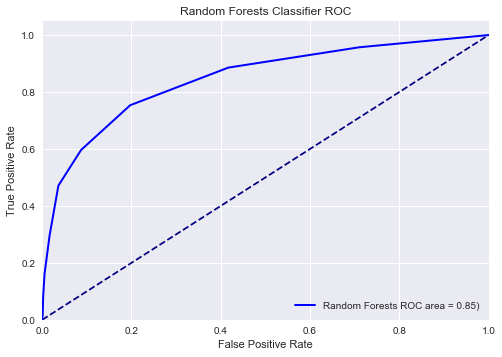

In [91]:
from sklearn.metrics import auc
probsrmfr = rmfr.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, probsrmfr)
roc_auc = auc(fpr, tpr)
#GRAPH DATA
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Random Forests Classifier ROC')
plt.plot(fpr, tpr, color='blue', lw=2, label='Random Forests ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()

### Word-Coefficient Dictionary

Here I use Random Forests 'feature_importances_' method to create a dictionary which maps to all the words present in the vocabulary matrix, their respective importance coefficient found by the Classifier

In [92]:
feature_coef_dict = {word: coef for word, coef in zip(vocab.get_feature_names(), rmfr.feature_importances_[:])}

In [93]:
#feature_coef_dict

### Positive Words

Here I load a list of famous Positive words, useful when analyzing customer service of a Restaurant or a Hotel.

The List was created by Bing Liu et al (see 'Text Analytics on Yelp Reviews to Improve the Restaurant Business' Thesis for reference)

In [94]:
positive_list = [line.rstrip('\n') for line in open('/Users/gianmarcosoraru/Downloads/positive.txt')]

In [95]:
#positive_list

I filter out only the positive words present in my word coefficient dictionary 'feature_to_coef'

In [96]:
fl = list(feature_coef_dict.keys())
newd = {}
for i in positive_list:
    if i in fl:
        newd[i] = feature_coef_dict[i]

I print the top positive words in the Mc Donald's dictionary.

In [97]:
for best_positive in sorted(newd.items(), key=lambda x: x[1], reverse=True)[:15] :
    print(best_positive)

('friendly', 0.028552460062621715)
('great', 0.015286759765295574)
('clean', 0.015198202356830257)
('best', 0.015079709347893423)
('love', 0.011205480839304147)
('nice', 0.010641940429036132)
('fresh', 0.008268232532041578)
('good', 0.007741523757547467)
('thank', 0.005985902242571688)
('fast', 0.005624531601115385)
('smile', 0.0053544060954918375)
('free', 0.004458716563931679)
('pleasant', 0.003964012239296044)
('modern', 0.0038105309510487206)
('polite', 0.003076587257774454)


### MC WordCloud (Positive)

Below I plot the world clous of the most relevant positive words in Mc Donald's reviews

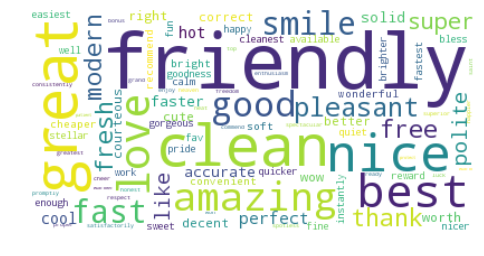

In [640]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color= 'white')
wordcloud.fit_words(frequencies=newd)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('mc_positive.png')
plt.savefig('mc_positive.pdf')
plt.show()

### Negative Words

Here I load a list of famous Negative words, useful when analyzing customer service of a Restaurant or a Hotel.

The List was created by Bing Liu et al (see 'Text Analytics on Yelp Reviews to Improve the Restaurant Business' Thesis for reference)

In [98]:
negative_list = [line.rstrip('\n') for line in open('/Users/gianmarcosoraru/Downloads/negative.txt')]

In [99]:
fl2 = list(feature_coef_dict.keys())
newd2 = {}
for i in negative_list:
    if i in fl2:
        newd2[i] = feature_coef_dict[i]

I print the top positive words in the Mc Donald's dictionary.

In [100]:
for best_negative in sorted(newd2.items(), key=lambda x: x[1], reverse = True)[:15]:
    print (best_negative)

('worst', 0.009573999233931355)
('slow', 0.0030266122249243558)
('rude', 0.0027728114674915472)
('cold', 0.0022798446152039083)
('wrong', 0.0019906521535350405)
('horrible', 0.0019043046549257706)
('bad', 0.0018833558738178158)
('dirty', 0.001485605931023386)
('irritated', 0.0012401161734249457)
('sucks', 0.001226459158585539)
('break', 0.0011898246944377795)
('fat', 0.001187902592238165)
('harsh', 0.0011144379943513524)
('hard', 0.001063076157232262)
('complain', 0.000936483296294038)


### MC WordCloud (Negative)

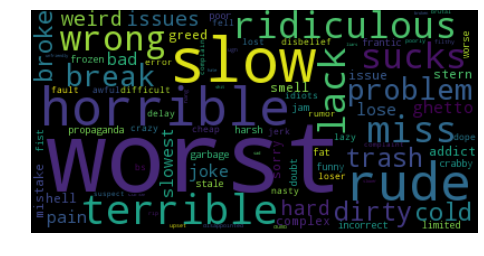

In [655]:
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#stopwords = set(STOPWORDS)
#stopwords.update(["worst","horrible"])
wordcloud = WordCloud()
wordcloud.fit_words(frequencies=newd2)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('mc_negative.png')
plt.savefig('mc_negative.pdf')
plt.show()

## 3.2.2 In-N-Out Burger

In [101]:
innout_dataframe = df_2018_restaurants[df_2018_restaurants.name == "In-N-Out Burger"]

In [102]:
innout_dataframe = innout_dataframe.apply(text_polarity, axis=1)

In [103]:
innout_dataframe.shape

(1237, 21)

### Random Forests on Balanced Data with BoW

In [104]:
innout_dataframeX = innout_dataframe['text']
innout_dataframey = innout_dataframe['polarity']

I clean the text.

In [105]:
innout_dataframeXClean = innout_dataframeX.apply(lambda x: text_cleaning(x))

I create the Vocabulary Matrix

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
vocab = CountVectorizer().fit(innout_dataframeXClean)

I vectorize the reviews

In [107]:
innout_dataframeX = vocab.transform(innout_dataframeX)

Train the Random Forests Classifier

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(innout_dataframeX,innout_dataframey,test_size=0.3,random_state=3540)

In [118]:
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(X_train,y_train)
predrmfr = rmfr.predict(X_test)

/Users/gianmarcosoraru/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [110]:
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:")
print(classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[  7  60]
 [  5 300]]
Score: 82.53
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.10      0.18        67
           1       0.83      0.98      0.90       305

   micro avg       0.83      0.83      0.83       372
   macro avg       0.71      0.54      0.54       372
weighted avg       0.79      0.83      0.77       372



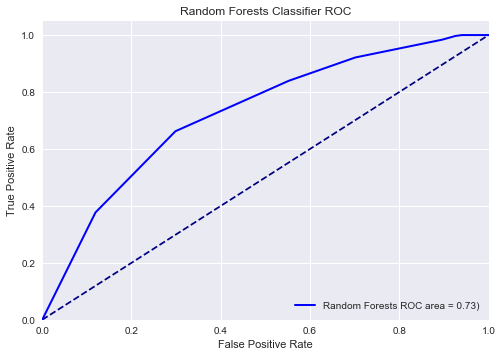

In [111]:
from sklearn.metrics import auc
probsrmfr = rmfr.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, probsrmfr)
roc_auc = auc(fpr, tpr)
#GRAPH DATA
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Random Forests Classifier ROC')
plt.plot(fpr, tpr, color='blue', lw=2, label='Random Forests ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()

### Word-Coefficient Dictionary

Here I use Random Forests 'feature_importances_' method to create a dictionary which maps to all the words present in the vocabulary matrix, their respective importance coefficient found by the Classifier

In [112]:
feature_coef_dict = {word: coef for word, coef in zip(vocab.get_feature_names(), rmfr.feature_importances_[:])}

In [113]:
#feature_coef_dict

### Positive Words 

In [671]:
# (I'm pretty sure I don't need to load it every time)
positive_list = [line.rstrip('\n') for line in open('/Users/gianmarcosoraru/Downloads/positive.txt')]

I filter out only the positive words i need for my analysis

In [119]:
fl = list(feature_coef_dict.keys())
newd = {}
for i in positive_list:
    if i in fl:
        newd[i] = feature_coef_dict[i]

In [120]:
for best_positive in sorted(newd.items(), key=lambda x: x[1], reverse=True)[:15] :
    print(best_positive)

('fast', 0.005747556391960679)
('like', 0.005649603369445161)
('better', 0.003875762279952699)
('fine', 0.003272486312765989)
('good', 0.0030683960968245494)
('faster', 0.002781812347118371)
('worth', 0.002771909501947791)
('friendly', 0.002529575775644688)
('nice', 0.002297867071911561)
('top', 0.0022838541741808265)
('work', 0.002131002254258256)
('right', 0.0021045095389249633)
('wonder', 0.0020226779487078394)
('free', 0.0019746068294801454)
('glad', 0.0019623888323678663)


### In-N-Out WordCloud (Positive)

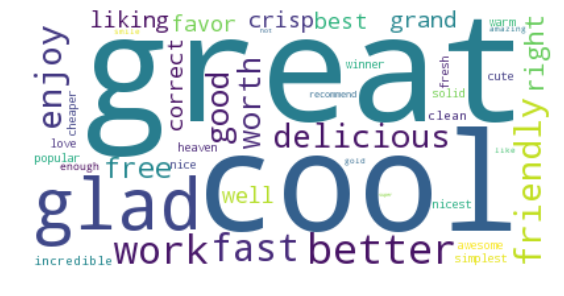

In [681]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white')
wordcloud.fit_words(frequencies=newd)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.savefig('inout_positive.png')
plt.savefig('inout_positive.pdf')
plt.show()

### Negative Words

In [682]:
negative_list = [line.rstrip('\n') for line in open('/Users/gianmarcosoraru/Downloads/negative.txt')]

In [121]:
fl2 = list(feature_coef_dict.keys())
newd2 = {}
for i in negative_list:
    if i in fl2:
        newd2[i] = feature_coef_dict[i]

In [122]:
for best_negative in sorted(newd2.items(), key=lambda x: x[1], reverse = True)[:15]:
    print (best_negative)

('worst', 0.025224196148516214)
('sad', 0.007437979746657152)
('cold', 0.006524626145251605)
('fat', 0.00532257646597234)
('disappointed', 0.004677348627141263)
('ghetto', 0.004539964796312936)
('hype', 0.0036148131793672365)
('bad', 0.003205576828525336)
('flair', 0.0030983127495598857)
('absurd', 0.0028886462289497315)
('slowest', 0.0028604782239495903)
('cheap', 0.002854818186454924)
('loss', 0.0026858445694224247)
('shake', 0.0024862868821663026)
('idiot', 0.0024455504475788615)


### In-N-Out WordCloud (Negative)

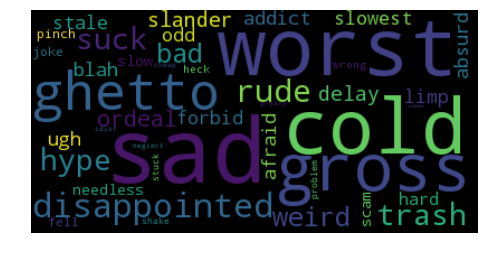

In [710]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.fit_words(frequencies=newd2)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

## 3.2.3 Chick-fil-A

In [123]:
chickfila_dataframe = df_2018_restaurants[df_2018_restaurants.name == 'Chick-fil-A']

In [124]:
chickfila_dataframe = chickfila_dataframe.apply(text_polarity, axis=1)

### Random Forests on Balanced Data with BoW

In [125]:
chickfila_dataframeX = chickfila_dataframe['text']
chickfila_dataframey = chickfila_dataframe['polarity']

I clean the text.

In [126]:
chickfila_dataframeXClean = chickfila_dataframeX.apply(lambda x: text_cleaning(x))

I create the Vocabulary Matrix

In [127]:
from sklearn.feature_extraction.text import CountVectorizer
vocab = CountVectorizer().fit(chickfila_dataframeXClean)

I vectorize the reviews

In [128]:
chickfila_dataframeX = vocab.transform(chickfila_dataframeX)

Train the Random Forests Classifier

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(innout_dataframeX,innout_dataframey,test_size=0.3,random_state=3540)

In [140]:
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(X_train,y_train)
predrmfr = rmfr.predict(X_test)

/Users/gianmarcosoraru/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [141]:
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:")
print(classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[ 11  56]
 [  7 298]]
Score: 83.06
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.16      0.26        67
           1       0.84      0.98      0.90       305

   micro avg       0.83      0.83      0.83       372
   macro avg       0.73      0.57      0.58       372
weighted avg       0.80      0.83      0.79       372



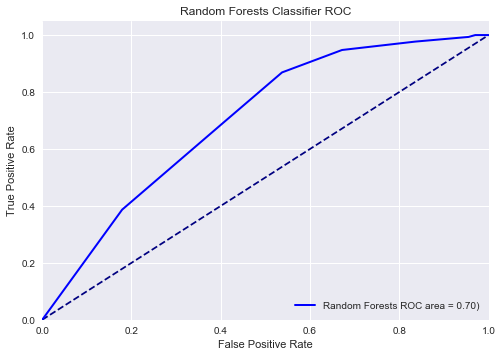

In [142]:
from sklearn.metrics import auc
probsrmfr = rmfr.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, probsrmfr)
roc_auc = auc(fpr, tpr)
#GRAPH DATA
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Random Forests Classifier ROC')
plt.plot(fpr, tpr, color='blue', lw=2, label='Random Forests ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()

### Word-Coefficient Dictionary

In [143]:
feature_coef_dict = {word: coef for word, coef in zip(vocab.get_feature_names(), rmfr.feature_importances_[:])}

### Positive Words

In [144]:
positive_list = [line.rstrip('\n') for line in open('/Users/gianmarcosoraru/Downloads/positive.txt')]

I filter out only the positive words i need for my analysis

In [145]:
fl = list(feature_coef_dict.keys())
newd = {}
for i in positive_list:
    if i in fl:
        newd[i] = feature_coef_dict[i]

In [146]:
for best_positive in sorted(newd.items(), key=lambda x: x[1], reverse=True)[:15] :
    print(best_positive)

('delicious', 0.004163105735069924)
('cherish', 0.0030298061514068214)
('thank', 0.0030136718932609846)
('cleaner', 0.002705776903554742)
('fair', 0.0023605207562661734)
('award', 0.002128198432951242)
('bless', 0.0020722889128782724)
('happier', 0.0020567464441757738)
('modern', 0.002029222279109172)
('astonish', 0.0019746797635483517)
('patient', 0.0017301172551333558)
('proud', 0.0015577251476807)
('good', 0.0014608056538748062)
('cute', 0.0013210682932715664)
('won', 0.001086300298922928)


### Chick-fil-A WordCloud (Positive)

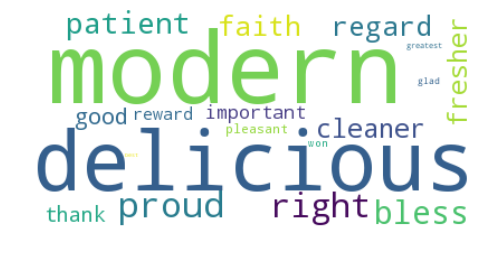

In [778]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white')
wordcloud.fit_words(frequencies=newd)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Negative Words

In [779]:
negative_list = [line.rstrip('\n') for line in open('/Users/gianmarcosoraru/Downloads/negative.txt')]

In [137]:
fl2 = list(feature_coef_dict.keys())
newd2 = {}
for i in negative_list:
    if i in fl2:
        newd2[i] = feature_coef_dict[i]

In [138]:
for best_negative in sorted(newd2.items(), key=lambda x: x[1], reverse = True)[:10]:
    print (best_negative)

('goof', 0.0033848845185050777)
('needless', 0.003208200455456596)
('issue', 0.002878628493473845)
('mad', 0.0025874372323405415)
('rant', 0.002483848904545365)
('bug', 0.0023151974008535844)
('complaint', 0.002157077244664567)
('delay', 0.0020976371544234994)
('lame', 0.002011861329620473)
('sink', 0.001545643404797721)


### Chick-fil-A WordCloud (Negative)

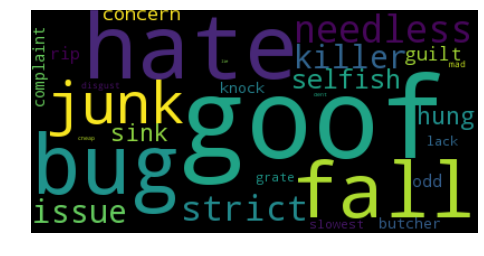

In [791]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.fit_words(frequencies=newd2)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 3.2.4 Shake Shack

In [148]:
shakeshack_dataframe = df_2018_restaurants[df_2018_restaurants.name == 'Shake Shack']

In [149]:
shakeshack_dataframe = shakeshack_dataframe.apply(text_polarity, axis=1)

In [150]:
shakeshack_dataframe.shape

(1118, 21)

### Random Forests on Balanced Data with BoW

In [151]:
shakeshack_dataframeX = shakeshack_dataframe['text']
shakeshack_dataframey = shakeshack_dataframe['polarity']

I clean the text.

In [152]:
shakeshack_dataframeXClean = shakeshack_dataframeX.apply(lambda x: text_cleaning(x))

I create the Vocabulary Matrix

In [153]:
from sklearn.feature_extraction.text import CountVectorizer
vocab = CountVectorizer().fit(shakeshack_dataframeXClean)

I vectorize the reviews

In [154]:
shakeshack_dataframeX = vocab.transform(shakeshack_dataframeX)

Train the Random Forests Classifier

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(innout_dataframeX,innout_dataframey,test_size=0.3,random_state=3540)

In [156]:
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(X_train,y_train)
predrmfr = rmfr.predict(X_test)

/Users/gianmarcosoraru/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [157]:
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:")
print(classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[  8  59]
 [  3 302]]
Score: 83.33
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.12      0.21        67
           1       0.84      0.99      0.91       305

   micro avg       0.83      0.83      0.83       372
   macro avg       0.78      0.55      0.56       372
weighted avg       0.82      0.83      0.78       372



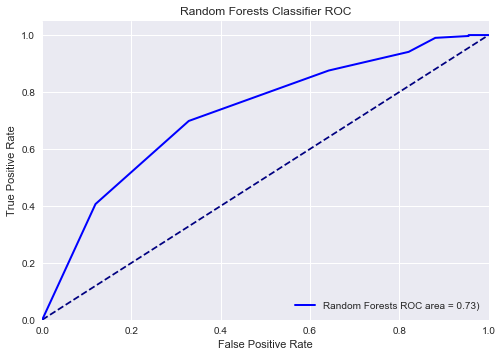

In [158]:
from sklearn.metrics import auc
probsrmfr = rmfr.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, probsrmfr)
roc_auc = auc(fpr, tpr)
#GRAPH DATA
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Random Forests Classifier ROC')
plt.plot(fpr, tpr, color='blue', lw=2, label='Random Forests ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()

### Word-Coefficient Dictionary

In [159]:
feature_coef_dict = {word: coef for word, coef in zip(vocab.get_feature_names(), rmfr.feature_importances_[:])}

### Positive Words

In [160]:
positive_list = [line.rstrip('\n') for line in open('/Users/gianmarcosoraru/Downloads/positive.txt')]

I filter out only the positive words i need for my analysis

In [161]:
fl = list(feature_coef_dict.keys())
newd = {}
for i in positive_list:
    if i in fl:
        newd[i] = feature_coef_dict[i]

In [162]:
for best_positive in sorted(newd.items(), key=lambda x: x[1], reverse=True)[:15] :
    print(best_positive)

('nicely', 0.006651956251489519)
('finest', 0.005909646811447674)
('support', 0.005634184959053884)
('nicest', 0.004961305595449104)
('grand', 0.003899825030513261)
('cleanest', 0.0037832589333971897)
('marvel', 0.003147064708188564)
('solid', 0.0025079585190637375)
('rich', 0.002136711185634673)
('sleek', 0.0017197973807238)
('bliss', 0.0015877777712122176)
('relish', 0.0014397659333481056)
('friendly', 0.0009701125923175641)
('gem', 0.0009584106782377127)
('lovely', 0.000916106797436721)


### Shake Shack WordCloud (Positive)

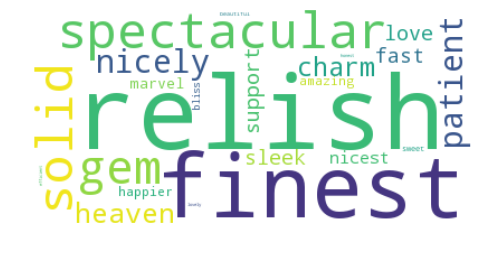

In [811]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white')
wordcloud.fit_words(frequencies=newd)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Negative Words

In [163]:
# List of common negative words
negative_list = [line.rstrip('\n') for line in open('/Users/gianmarcosoraru/Downloads/negative.txt')]

In [164]:
fl2 = list(feature_coef_dict.keys())
newd2 = {}
for i in negative_list:
    if i in fl2:
        newd2[i] = feature_coef_dict[i]

In [166]:
for best_negative in sorted(newd2.items(), key=lambda x: x[1], reverse = True)[:10]:
    print (best_negative)

('awkward', 0.00817485114016966)
('deter', 0.0065551582628838425)
('rage', 0.005372625623358752)
('disappoint', 0.0038718707272309963)
('fat', 0.0034585894513100416)
('disinterest', 0.002961417127191627)
('downer', 0.002595381350364448)
('slap', 0.0024611387697415672)
('butcher', 0.0024497649446204857)
('swipe', 0.0023903788747899357)


### Shake Shack WordCloud (Negative)

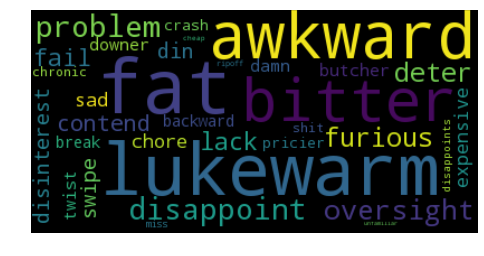

In [818]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.fit_words(frequencies=newd2)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()